# 任务一
从UCI下载鸢尾花数据集，对数据集进行处理，整理、分割为训练集与测试集；

## 1、导入所需的库

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
from sklearn import model_selection, svm

## 2、加载数据

In [2]:
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]


path = "./data/iris.txt"
data = np.loadtxt(path, dtype=float, delimiter=",", converters={4: iris_type})
print(data[:10])


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]


## 3、划分训练集和测试集

In [3]:
X, y = np.split(data, (4,), axis=1)
x = X[:, 0:2]
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, random_state=1, test_size=0.3)


# 任务二
利用训练集训练sklearn自带的svm模型并对测试集数据进行预测，计算预测精度，并进行可视化分析。

## 1、搭建模型并训练

In [4]:
classifier = svm.SVC(kernel='rbf', gamma=0.1,
                     decision_function_shape='ovo', C=0.8)  # 构建分类器

classifier.fit(x_train, y_train.ravel())  # 开始训练
# 计算svm分类器的准确率
print("SVM-输出训练集的准确率为: ", classifier.score(x_train, y_train))
y_hat = classifier.predict(x_train)

print("SVM-输出测试集的准确率为: ", classifier.score(x_test, y_test))
y_hat = classifier.predict(x_test)

print('\npredict:\n', classifier.predict(x_train))


SVM-输出训练集的准确率为:  0.8380952380952381
SVM-输出测试集的准确率为:  0.7777777777777778

predict:
 [2. 0. 0. 0. 1. 0. 0. 2. 2. 2. 2. 2. 2. 2. 1. 0. 1. 2. 0. 0. 2. 0. 2. 2.
 2. 1. 2. 2. 0. 1. 2. 2. 1. 2. 1. 0. 0. 0. 2. 0. 1. 2. 1. 0. 0. 1. 0. 2.
 2. 2. 2. 1. 2. 2. 1. 0. 1. 0. 1. 2. 0. 2. 0. 0. 2. 1. 2. 0. 0. 2. 0. 1.
 0. 2. 1. 0. 2. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 2. 0. 2. 1. 1. 2. 1. 0. 0.
 1. 1. 2. 1. 2. 2. 1. 2. 0.]


## 2、对结果进行可视化

grid_ test = 
 [[4.3       2.       ]
 [4.3       2.0120603]
 [4.3       2.0241206]
 ...
 [7.9       4.3758794]
 [7.9       4.3879397]
 [7.9       4.4      ]]
grid_ hat = 
 [0. 0. 0. ... 2. 2. 2.]


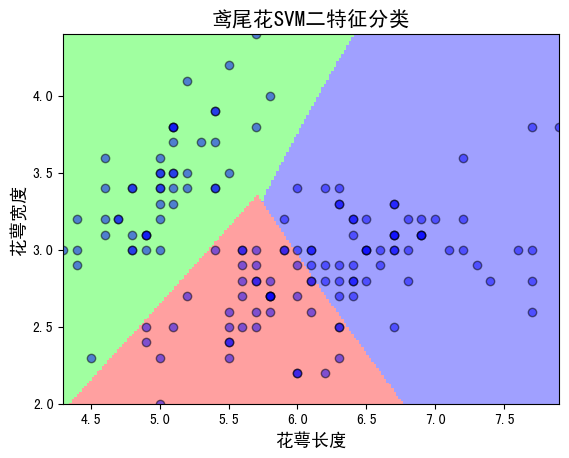

In [5]:
# 绘制图像
# 1.确定坐标轴范围，x，y轴分别表示两个特征
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
print("grid_ test = \n", grid_test)
grid_hat = classifier.predict(grid_test)
# 预测分类值
print("grid_ hat = \n", grid_hat)
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

# 2.指定默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 3.绘制
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
alpha = 0.5
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示
# 样本
plt.plot(x[:, 0], x[:, 1], 'o', alpha=alpha, color='blue', markeredgecolor='k')
plt.scatter(x_test[:, 0], x_test[:, 1], s=120,
            facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
plt.show()


0.8380952380952381
[(2.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (2.0, 2.0), (1.0, 2.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (2.0, 1.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (2.0, 2.0), (2.0, 2.0), (1.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (1.0, 1.0), (2.0, 2.0), (2.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (2.0, 2.0), (1.0, 2.0), (2.0, 2.0), (2.0, 2.0), (1.0, 1.0), (2.0, 2.0), (2.0, 2.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 2.0), (0.0, 0.0), (1.0, 2.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (2.0, 1.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0), (1.0, 2.0), (0.0, 0.0), (2.0, 1.0), (0.0, 0.0), (2.0, 2.0), (2.0, 1.0), (0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.

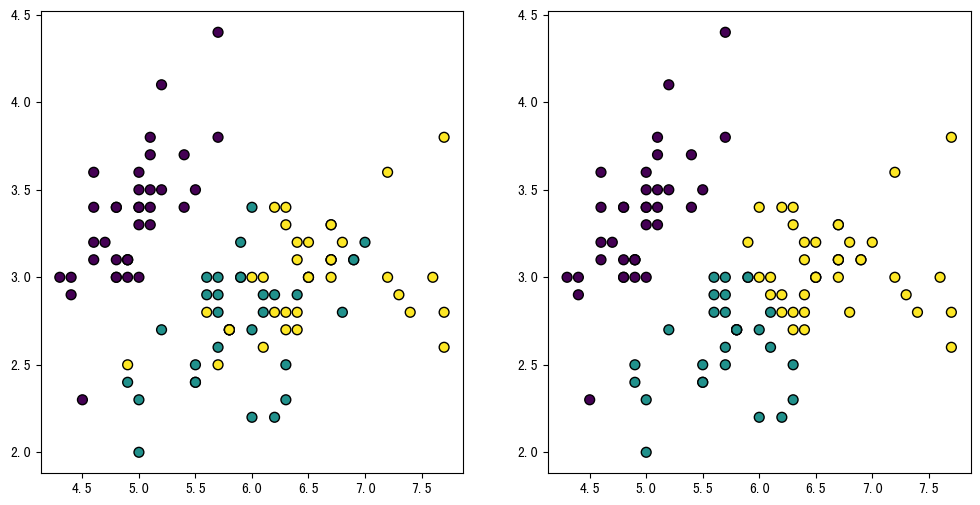

In [6]:
#输出训练集的准确率
print(classifier.score(x_train, y_train))
#首先将原始结果与训练集预测结果进行对比:
y_train_hat = classifier.predict(x_train)
y_train_1d = y_train.reshape((-1))
comp = zip(y_train_1d, y_train_hat)  #用zip 把原始结果和预测结果放在一起。显示如下:
print(list(comp))
#同样的,可以用训练好的模型对测试集的数据进行预测:
print(classifier.score(x_test, y_test))
y_test_hat = classifier.predict(x_test)
y_test_1d = y_test.reshape((-1))
comp = zip(y_test_1d, y_test_hat)
print(list(comp))

#还可以通过图像进行可视化:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.reshape((-1)), edgecolors='k', s=50)
plt.subplot(122)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train_hat.reshape((-1)), edgecolors='k', s=50)
plt.show()
